# Finite Difference for 2D Poisson's equation
Poisson Equation:
$$\nabla \cdot (\nabla \sigma \Phi) + f = 0$$
More general:
$$\Delta u + f = 0$$
Discretize the laplacian operator
$$\Delta u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \approx \frac{u_{i+1,j} - 2 u_{i,j} + u_{i-1,j}}{\Delta x^2} + \frac{u_{i,j+1} - 2 u_{i,j} + u_{i,j-1}}{\Delta y^2}$$
with $\Delta x = \Delta y = h$<br/>
The matrix form
$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \approx  A \cdot \vec{u}$$

In [22]:
from tqdm import tqdm_notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# for animation
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

## Parameters

In [35]:
# time
delta_t = 0.02
t_end = 5
timesteps = np.arange(0,t_end, delta_t)
n_timesteps = len(timesteps)

# space
n_x = 50
n_y = 50
x_min = 0
x_max = 2
y_min = 0
y_max = 1
delta_x = (x_max - x_min) / (n_x - 1)
delta_y = (y_max - y_min) / (n_y - 1)

x = np.linspace(x_min, x_max, n_x)
y = np.linspace(x_min, x_max, n_y)

## Simulation

In [36]:
# Initialization
p  = np.zeros((n_timesteps, n_y, n_x))
b  = np.zeros((n_y, n_x))

# Source
b[int(ny / 4), int(nx / 4)]  = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -100

# solve poisson
for t_index,t in enumerate(tqdm_notebook(timesteps)):
    if t_index < n_timesteps-1:
        p[t_index+1, 1:-1,1:-1] = (((p[t_index, 1:-1, 2:] + p[t_index, 1:-1, :-2]) * delta_y**2 +
                        (p[t_index, 2:, 1:-1] + p[t_index, :-2, 1:-1]) * delta_x**2 -
                        b[1:-1, 1:-1] * delta_x**2 * delta_y**2) / 
                        (2 * (delta_x**2 + delta_y**2)))

        # boundary conditions
        p[t_index+1, 0, :] = 0
        p[t_index+1, n_y-1, :] = 0
        p[t_index+1, :, 0] = 0
        p[t_index+1, :, n_x-1] = 0

## Plot results

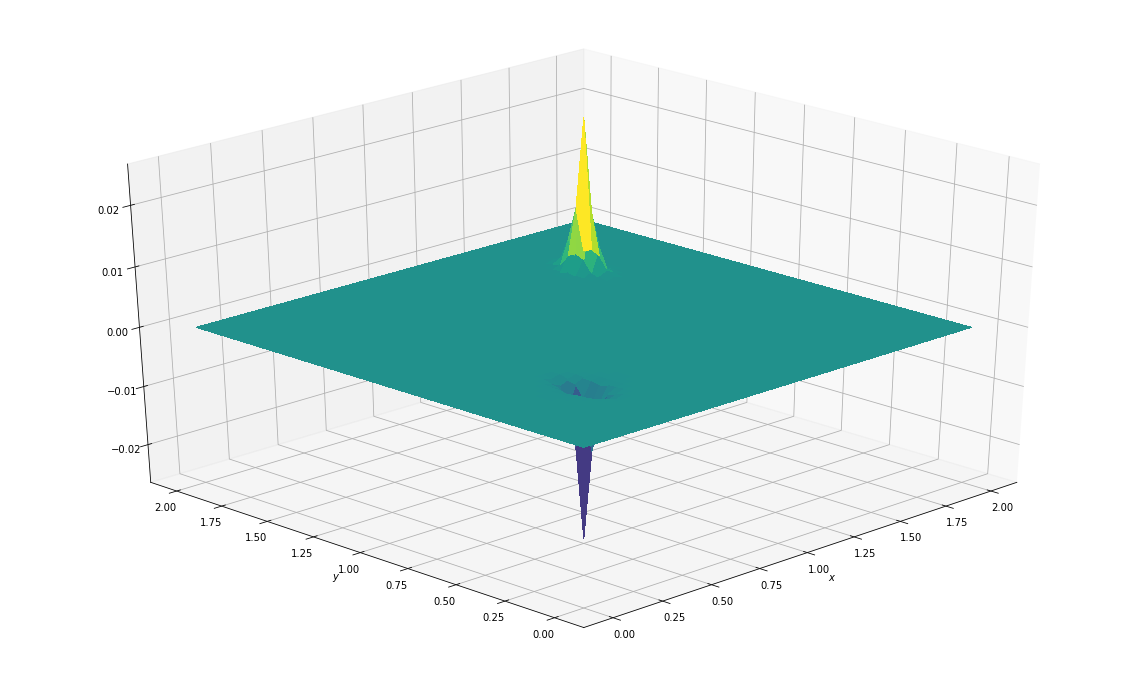

In [37]:
fig = plt.figure(figsize=(20, 12))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, p[5,:], rstride=1, cstride=1, cmap="viridis",
        linewidth=0, antialiased=False)
ax.view_init(30, 225)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.show()

## Animate

In [ ]:
# setup canvas
fig = plt.figure()
fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ax.view_init(30, 225)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlim(( -0.05, 0.05))
plot = ax.plot_surface(X, Y, p[0,:], rstride=1, cstride=1, linewidth=0, antialiased=False, cmap="viridis")
plt.close(fig)

def animate(t, p, plot):
    i = int(t / delta_t)
    ax.clear()
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlim(( -0.05, 0.05))
    plot = ax.plot_surface(X, Y, p[i,:], rstride=1, cstride=1, linewidth=0, antialiased=False, cmap="viridis")
    return plot,
    
anim = animation.FuncAnimation(fig, animate,
                               frames=tqdm_notebook(timesteps), interval=20, 
                               blit=True, fargs=(p, plot))
#plt.show()
# embed as html video
#HTML(anim.to_html5_video()) 
# interactive player
HTML(anim.to_jshtml())